<h1 style="color:rgb(0,120,170)">Assignment 2a</h1>
<h2 style="color:rgb(208,90,80)">Topic: Maximum Likelihood</h2>

<h2 style="color:rgb(0,120,170)">Machine Learning: Unsupervised Techniques, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline March 31th 2019, 24:00</h3>
Return this notebook with your code and answers.

# Exercise 2:

Compute the Maximum Likelihood Estimator for the parameter $\lambda$ of a
Poisson distribution. This means: Assuming we have a sample ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes

$$
\prod_{i}^{n} \mathcal{P}\left( x_{i}; \lambda \right) = \prod_{i}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$

Document which calculation rules you applied and make sure your approaches are comprehensible.

**Hint:** You will have a much easier time if you first take the logarithm of the density function.

----------------
----------------
<h3 style="color:rgb(0,120,170)">Question 2:</h3>

 1. Compute the Maximum Likelihood Estimator for the parameter $\lambda$ of a
Poisson distribution.
     * <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 2.1:</h3>

Firstly we reformulate according to the log-likelihood: 
$$
\text{ln} \big(\prod_{i}^{n} \mathcal{P}\left( x_{i}; \lambda \right)\big) = \sum_i^n \text{ln}(\frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda})  
$$

Applying logarithm rules: 
$$
\sum_i^n \text{ln}(\frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}) = \\
\sum_i^n \text{ln}(\frac{\lambda^{x_{i}}}{x_{i}!}) + \text{ln}(\mathcal{e}^{-\lambda}) = \\
\sum_i^n \text{ln}(\frac{\lambda^{x_{i}}}{x_{i}!}) - \lambda = \\
\sum_i^n \text{ln}(\lambda^{x_{i}}) - \text{ln}({x_{i}!}) - \lambda = \\
\sum_i^n x_i\text{ln}(\lambda) - \text{ln}({x_{i}!}) - \underbrace{\lambda}_\text{constant} = \\
\sum_i^n \big(x_i\text{ln}(\lambda) - \text{ln}({x_{i}!})\big) -n \lambda
$$

Taking the derivative and setting it to zero:
$$
\frac{\partial \text{ln} L}{\partial \lambda} = 0 \\
\frac{\partial \sum_i^n \big(x_i\text{ln}(\lambda) - \text{ln}({x_{i}!})\big) -n \lambda}{\partial \lambda} = 0\\
\sum_i^n \frac{x_i}{\hat\lambda} -n = 0 \\
\sum_i^n \frac{x_i}{\underbrace{\hat\lambda}_\text{constant}} = n \\
\frac{1}{\hat\lambda} \sum_i^n \underbrace{x_i}_\text{iid}  = n \\
\frac{1}{\hat\lambda} n \overline{x} = n \\
\frac{1}{\hat\lambda} \overline{x} = 1 \\
\hat\lambda = \overline{x}
$$

# Exercise 3:

Plot the log-likelihood from exercise 2 as a function of λ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for λ we suggest values from 1 to 50 with a step size of 0.5 (0, 0.5, 1.0, ...). 

----------------
----------------
<h3 style="color:rgb(0,120,170)">Question 3:</h3>

 1. Plot the log-likelihood. Mark the position where the maximum occurs.
     * <span style="color:rgb(0,120,170)">**TODO:** Code</span>
 
 2. Explain and discuss the result in your own words. Where is the maximum?
     * <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 3.1:</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [2]:
X = data_df.values

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


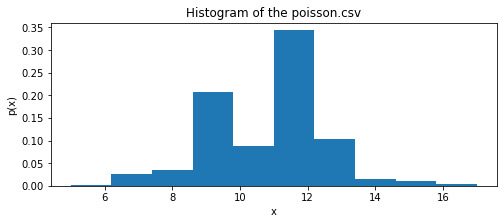

In [3]:
plt.figure(figsize=(8,3))
f = plt.hist(data_df.T, density=len(data_df))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of the poisson.csv');
plt.show()

**Log Likelihood:**

In [4]:
import math

def loglikelihood(X, lam):
    "Implementation of the log likelihood for a given dataset X"
    if lam==0:
        return -1
    l = 0
    for xi in X.ravel():
        l+=xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return l

In [5]:
#test the function
lam_set = np.linspace(1,50,100)

np.set_printoptions(precision=4)
print("Log-likelihood {}".format(loglikelihood(X,lam_set[0])))
print("Log-likelihood {}".format(loglikelihood(X,lam_set[1])))
print("Log-likelihood {}".format(loglikelihood(X,lam_set[3])))

Log-likelihood -17657.375145141297
Log-likelihood -13891.351226888648
Log-likelihood -9496.710395590679


* <span style="color:rgb(208,90,80)">**TODO:** Code</span>
Implement the estimator_formula function

In [6]:
def estimator_formula(X):
    """ the estimator returns lambda hat arcording to the result A2.1"""
    
    #Accoring to A2.1 the maximum likelihood estimator is ...
    return X.mean()

In [7]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda (formula)=',lam_max_formula)

Likelihood is maximal at lambda (formula)= 10.597


* <span style="color:rgb(208,90,80)">**TODO:** Code</span>
Implement the estimator_argmax function

In [8]:
def estimator_argmax(X, lam_set):
    loglikelih = np.asarray([loglikelihood(X, lam) for lam in lam_set])
    return loglikelih, np.min(loglikelih), np.max(loglikelih), lam_set[loglikelih.argmax()]

In [9]:
lam_set = np.arange(1, 50, 0.5) # start, end, stepsize
loglikelih, ln_min, ln_max, lam_max = estimator_argmax(X, lam_set)
print('Likelihood is maximal at lambda (argmax)=', lam_max)

Likelihood is maximal at lambda (argmax)= 10.5


* <span style="color:rgb(208,90,80)">**TODO:** Code</span>
* Implement the loglikelih function over lam_set
* mark the maximum in the plot (estimator_formula, estimator_argmax)

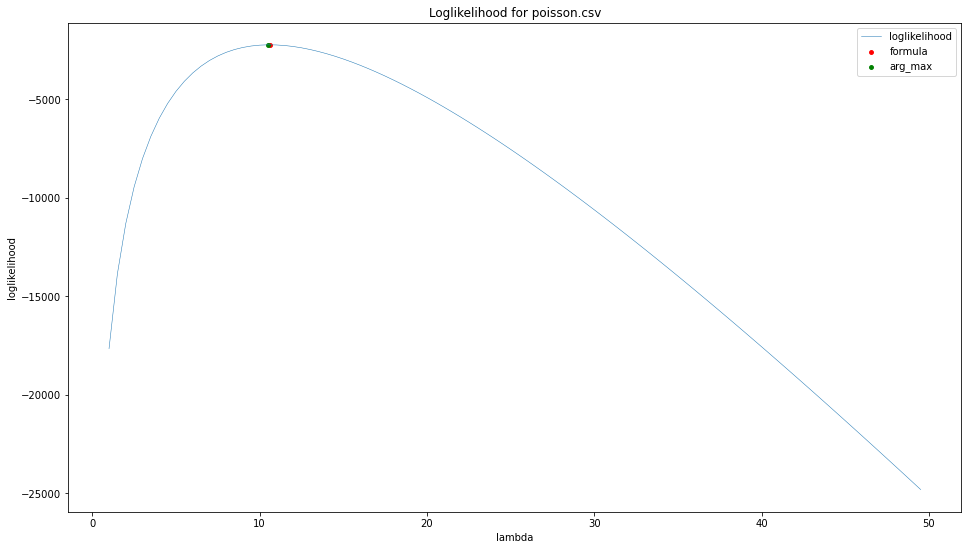

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(lam_set, loglikelih, linewidth=.5)

plt.scatter(estimator_formula(X), loglikelihood(X, estimator_formula(X)), s=15, color='red')
plt.scatter(lam_max, estimator_argmax(X, [lam_max])[1], s=15, color='green')
plt.legend(['loglikelihood', 'formula', 'arg_max'])
plt.xlabel('lambda')
plt.ylabel('loglikelihood')
plt.title('Loglikelihood for poisson.csv')
plt.show()

<h3 style="color:rgb(208,90,80)">Answer 3.2:</h3>


As we can see from the plot, the results for both maxima (*formula* and *arg_max*) are very similar.
However, the exact formula (*formula*) yields a higher (thus better) estimation of the true parameter $\lambda$ than the approximation (*arg_max*).

So where **IS** the maximum? From our limited data sample we cannot know what the **true** parameter $\lambda$. For these 1000 samples, the maximum is at 10.597 (=*formula* result). 